In [36]:
import numpy as np
import os, sys
from PIL import Image
from matplotlib import pyplot as plt
import pickle

## Resize images

In [37]:
def resize(path, files_list, dim=384):
    for item in files_list:
        if os.path.isfile(path + item):
            im = Image.open(path + item)
            f, e = os.path.splitext(path + item)
            # Anti-alias is a high quality downsampling method
            if im.size != (dim, dim):
                imResize = im.resize((dim, dim), Image.ANTIALIAS)
#             imResize.save(f + '.jpg', 'JPEG', quality=90)
                imResize.save(f + '.jpg', 'JPEG')

In [38]:
# veg is class 0, beef is class 1, cheese is class 2, bread is class 3, dessert is class 4

# classes = [0, 1, 2, 3, 4]
classes = [4]
for cur_class in classes:
    path = "data/{}/".format(cur_class)
    files_list = os.listdir(path)
    resize(path, files_list, dim=384)

## Save training images as numpy matrices

In [39]:
def load_images_from_folder(files_path, labels, channels=3, height=384, width=384):

    first = True
    
    for i in labels:
        print("label=", i)
        num_image = 0
        folder = files_path + "{}".format(i)

        for filename in os.listdir(folder):
            num_image += 1
            img = Image.open(os.path.join(folder, filename))
            if first:
                X = np.array(img)
                first = False
            else:
                X = np.vstack((X, np.array(img)))

        if i == 0:
            y = np.zeros(num_image)
        else:
            y = np.concatenate((y, np.zeros(num_image) + i))

    X = X.reshape((-1, height, width, channels))

    return X, y

In [40]:
files_path = "./data/"

In [41]:
labels = [0, 1, 2, 3, 4]
# labels = [0]

dim = 384

X_train, y_train = load_images_from_folder(files_path, labels, 
                                           channels=3, height=dim, width=dim)

label= 0
label= 1
label= 2
label= 3
label= 4


In [42]:
y_train = y_train.astype('int8')

In [43]:
np.save(files_path + "X_train.npy", X_train)
np.save(files_path + "y_train.npy", y_train)

In [44]:
# veg is class 0, beef is class 1, cheese is class 2, bread is class 3
categories = ['veg', 'beef', 'cheese', 'bread', 'dessert']

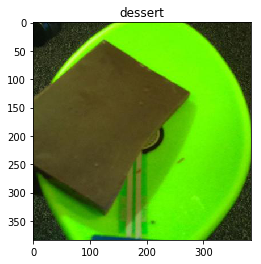

In [52]:
image_num = plt.imshow(X_train[299])
plt.title(categories[y_train[299]]);